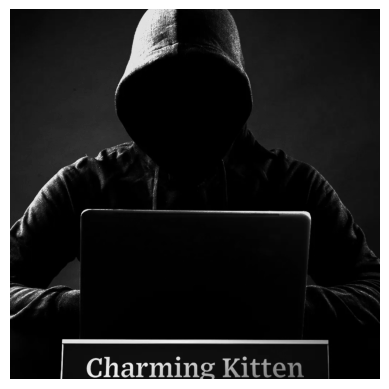

In [120]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow.keras.layers as ll

def grayscale_and_pad(image_path):
    original_image = Image.open(image_path)
    grayscale_image = original_image.convert('L')
    target_width, target_height = 1024, 1024
    pad_width = (target_width - grayscale_image.width) // 2
    pad_height = (target_height - grayscale_image.height) // 2
    padded_image = Image.new('L', (target_width, target_height), color='white')
    padded_image.paste(grayscale_image, (pad_width, pad_height))
    image_array = np.array(padded_image)
    return image_array

# Load and preprocess the output image (grayscale and padded)
output_image_path = 'security_hacker_names.webp'
output_image = grayscale_and_pad(output_image_path)

# Display the image
plt.imshow(output_image, cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


In [121]:
grid_size = 1024

# Create a grid of zeros with dimensions 1024x1024
coordinates_array = np.zeros((grid_size, grid_size, 2), dtype=int)

# Fill the array with coordinates
for x in range(grid_size):
    for y in range(grid_size):
        coordinates_array[x, y] = [x, y]
normalized_array = (coordinates_array / (grid_size - 1))*np.pi*0.5


sin_1 = np.sin(normalized_array)
cos_1 = np.cos(normalized_array)
sin_2 = np.sin(2 * normalized_array)
cos_2 = np.cos(2 * normalized_array)
sin_3 = np.sin(3 * normalized_array)
cos_3 = np.cos(3 * normalized_array)
x_train = np.dstack((normalized_array, sin_1, cos_1, sin_2, cos_2, sin_3, cos_3))
print(x_train.shape)

(1024, 1024, 14)


In [122]:

def leaky_relu(x):
    return tf.nn.leaky_relu(x, alpha=0.1)

def sigmoid_scaled(x):
    return 255 * tf.sigmoid(x)

model = tf.keras.models.Sequential([
    ll.Dense(units=16, input_shape=(14,), activation=leaky_relu),
    ll.Dense(units=32, activation=leaky_relu),
    ll.Dense(units=32, activation=leaky_relu),
    ll.Dense(units=32, activation=leaky_relu),
    ll.Dense(units=32, activation=leaky_relu),
    ll.Dense(units=32, activation=leaky_relu),
    ll.Dense(units=32, activation=leaky_relu),
    ll.Dense(units=1, activation=sigmoid_scaled),
])

model.compile(optimizer='adam', loss='mean_squared_error')
print(model.summary())




c:\Users\draar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_63 (Dense)                │ (None, 16)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,097 (23.82 KB)

 Trainable params: 6,097 (23.82 KB)

 Non-trainable params: 0 (0.00 B)

None


In [123]:
trainx = x_train.reshape((-1, 14))
trainy = output_image.reshape((-1,1))
# Combine trainx and trainy horizontally
combined_data = np.hstack((trainx, trainy))

# Shuffle the combined data along the first axis (rows)
np.random.shuffle(combined_data)
tx = combined_data[:, :-1]  # All columns except the last one
ty = combined_data[:, -1] 
model.fit(trainx, trainy, epochs=20000, batch_size=1048576, validation_split=0.1) 


Epoch 1/20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 10457.0371 - val_loss: 9313.5107
Epoch 2/20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 740ms/step - loss: 9862.4395 - val_loss: 8788.7451
Epoch 3/20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 775ms/step - loss: 9247.4629 - val_loss: 8250.5146
Epoch 4/20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 759ms/step - loss: 8609.7383 - val_loss: 7694.7422
Epoch 5/20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 741ms/step - loss: 7952.6631 - val_loss: 7125.0498
Epoch 6/20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 741ms/step - loss: 7282.0127 - val_loss: 6557.7188
Epoch 7/20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step - loss: 6604.0010 - val_loss: 5998.0166
Epoch 8/20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 741ms/step - loss: 5923.6836 - val_loss: 5455.2954
Epoch 9/20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 740ms/step - loss: 5249.6743 - val_loss: 4952.0566
Epoch 10/20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step - loss: 4594.7373 - val_loss: 4504.5757
Epoch 11/20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 712ms/step - loss: 3971.2266

In [124]:
modelImage = np.zeros((1024, 1024, 1))
print(x_train.shape)
# for x in range(1024):
predict = model.predict(x_train.reshape(-1, 14))
modelImage = predict.reshape(1024,1024)

(1024, 1024, 14)
32768/32768 ━━━━━━━━━━━━━━━━━━━━ 46s 1ms/step


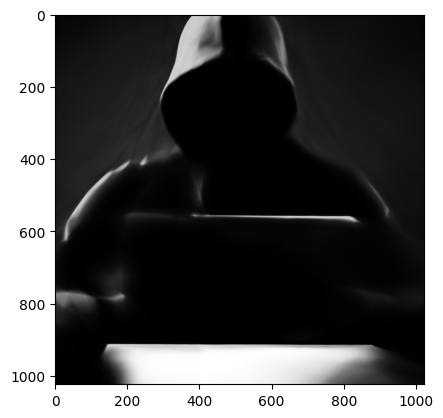

In [125]:
import matplotlib.pyplot as plt
# plt.imshow(modelImage, cmap="gray")

plt.imshow(modelImage, cmap='gray')

In [131]:
model.fit(trainx, trainy, epochs=200, batch_size=1048576)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 759ms/step - loss: 678.5286
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 812ms/step - loss: 678.4863
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 791ms/step - loss: 678.4441
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 748ms/step - loss: 678.4022
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 714ms/step - loss: 678.3607
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step - loss: 678.3194
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 731ms/step - loss: 678.2783
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step - loss: 678.2375
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 759ms/step - loss: 678.1973
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 731ms/step - loss: 678.1572
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 768ms/step - loss: 678.1172
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 753ms/step - loss: 678.0775
Epoch 13/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 734ms/step - loss: 678.0380
Epoch 14/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 749ms/step - loss: 677.9985
Epoch 15/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 72

In [132]:
modelImage = np.zeros((1024, 1024, 1))
print(x_train.shape)
# for x in range(1024):
predict = model.predict(x_train.reshape(-1, 14))
modelImage = predict.reshape(1024,1024)

(1024, 1024, 14)
32768/32768 ━━━━━━━━━━━━━━━━━━━━ 23s 692us/step


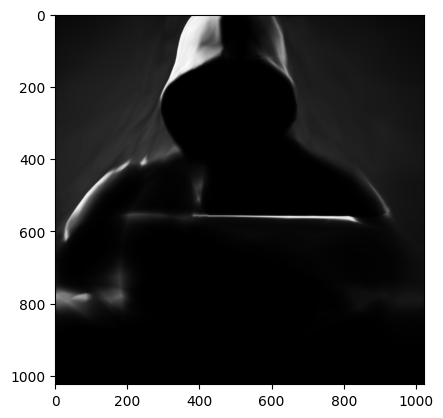

In [133]:
plt.imshow(modelImage, cmap="gray")